Biodiversity in National Parks Project

Scope: Analyze data about endangered species from various national parks to look for patterns in what types of animals become endangered and locations of endangered species.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read csv files
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

In [3]:
# Inspect observation data
print(observations_df.head())
observations_df.info()
observations_df.describe()
observations_df.drop_duplicates(subset = 'scientific_name', inplace = True)

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


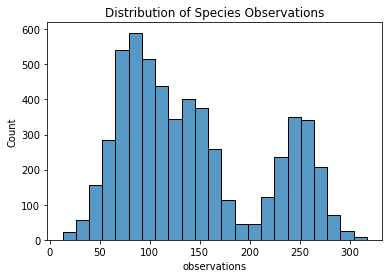

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot distribution of observations
sns.histplot(x = observations_df.observations)
plt.title('Distribution of Species Observations')
plt.show()
plt.clf()

In [5]:
# Inspect species data
print(species_df.head())
species_df.info()
species_df.describe()
species_df.drop_duplicates(inplace = True)

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

In [6]:
species_df.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
species_df.fillna('No Intervention', inplace = True)

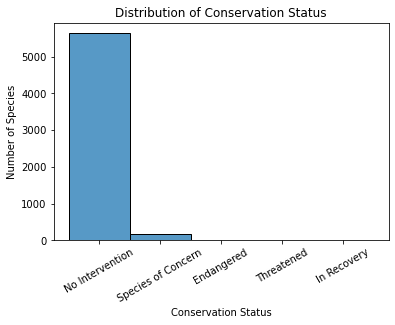

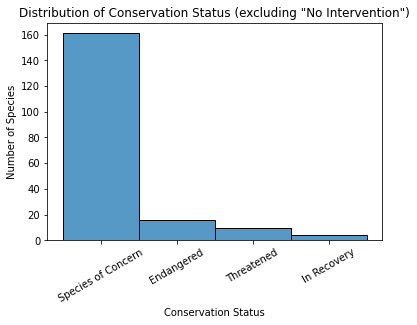

<Figure size 432x288 with 0 Axes>

In [8]:
# Plot distribution of conservation status
sns.histplot(x = species_df.conservation_status)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation = 30)
plt.show()
plt.clf()

sns.histplot(x = species_df.conservation_status[species_df.conservation_status != 'No Intervention'])
plt.title('Distribution of Conservation Status (excluding "No Intervention")')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation = 30)
plt.show()
plt.clf()

The majority of the species observed is not of concern for conservation purposes. Of the species that are of some concern, around 160 are Species of Concern, while approximately 15 are Endangered, approximately 10 are Threatened, and approximately 5 are In Recovery.

In [9]:
species_category = species_df[species_df.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
species_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


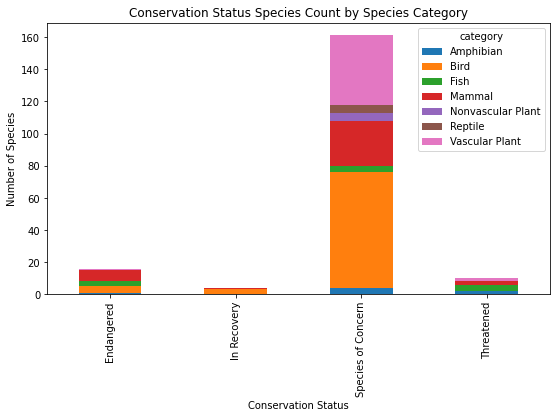

<Figure size 432x288 with 0 Axes>

In [10]:
ax = species_category.plot(kind = 'bar', stacked = True, figsize = (9, 5))
plt.title('Conservation Status Species Count by Species Category')
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.show()
plt.clf()

The vast majority of the observed species are Species of Concern. This is the only conservation category that contains species from all 7 species categories. The Endangered category includes mammals, vascular plants, fish, birds, nonvascular plants, and amphibians. In Recovery includes birds and mammals. Threatened contains vascular plants, mammals, fish, and amphibians.

Mammals and birds are the most likely to be endangered (confirmed by contingency table below).

In [11]:
# Observed frequency table
species_df['is_protected'] = species_df.conservation_status != 'No Intervention'
category_counts = species_df.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()
category_counts.columns = ['category', 'not protected', 'protected']
category_counts

,category,not protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [12]:
# Add 'percent protected' column to category_counts
category_counts['percent protected'] = category_counts['protected'] / (category_counts['protected'] + category_counts['not protected']) * 100
category_counts

,category,not protected,protected,percent protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [13]:
from scipy.stats import chi2_contingency

In [14]:
# Check for significance (pval < 0.05) between conservation status of mammals and birds
contingency_1 = [[30, 146],
                [75, 413]]
chi2_contingency(contingency_1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The chi2 statistic is 0.16, which is low, and the p-value is 0.69, which is larger than 0.05. These indicate that there is no statistical significance in the difference in conservation status between mammals and birds.

In [15]:
# Check for significance (pval < 0.05) between conservation status of mammals and reptiles
contingency_2 = [[30, 146],
                [5, 73]]
chi2_contingency(contingency_2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

The chi2 statistic is 4.3, and the p-value is 0.04, which indicate that there is a statistical significance between the conservation status of mammals and reptiles. Mammals are more likely to be protected species.

In [16]:
# Check for significance (pval < 0.05) between conservation status of birds and reptiles
contingency_3 = [[75, 413],
                [5, 73]]
chi2_contingency(contingency_3)

(3.7396547786854963,
 0.05313542232154235,
 1,
 array([[ 68.97526502, 419.02473498],
        [ 11.02473498,  66.97526502]]))

The chi2 statistic is 3.7, and the p-value is 0.05, which does not show strong evidence either way if there is a significant difference in the conservation status of birds and reptiles.

In [17]:
# Explore which species were spotted most at each park
observations_df.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [18]:
merge_df = observations_df.merge(species_df)
print(merge_df.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  is_protected  
0     No Intervention         False  
1     No Intervention         False  
2     No Intervention         False  
3     No Int

In [50]:
parks = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

for park in parks:
    max_park = merge_df.observations[merge_df.park_name == park].max()
    max_park_species = merge_df.common_names[(merge_df.observations == max_park) & (merge_df.park_name == park)]
    max_status = merge_df.is_protected[(merge_df.observations == max_park) & (merge_df.park_name == park)]
    print(park + ': ' + max_park_species + ', ' + str(max_park), max_status)
    pd.set_option('display.max_colwidth', None)

5019    Great Smoky Mountains National Park: Spiny Sowthistle, 147
Name: common_names, dtype: object 5019    False
Name: is_protected, dtype: bool
1551    Yosemite National Park: Southern Nodding Trillium, 219
Name: common_names, dtype: object 1551    False
Name: is_protected, dtype: bool
2809                                                Bryce National Park: Cultivated Oat, Oats, 163
2810    Bryce National Park: Common Oat, Common Oats, Oat, Oatgrass (Common), Oats, Wild Oats, 163
Name: common_names, dtype: object 2809    False
2810    False
Name: is_protected, dtype: bool
1164    Yellowstone National Park: Giant Red Indian Paintbrush, Great Red Indian Paintbrush, Great Red Indian-Paintbrush, Scarlet Indian Paintbrush, Scarlet Paintbrush, 317
Name: common_names, dtype: object 1164    False
Name: is_protected, dtype: bool


All of the most commonly-observed species in each park are plants. However, the species category most likely to be protected is mammals, so we should investigate which mammal species are the most commonly-observed in each park

In [20]:
# Explore which mammal species are observed most at each park

parks = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

for park in parks:
    max_park_mammal = merge_df.observations[(merge_df.park_name == park) & (merge_df.category == 'Mammal')].max()
    max_park_mammal_species = merge_df.common_names[(merge_df.observations == max_park_mammal) & (merge_df.park_name == park) & (merge_df.category == 'Mammal')]
    print(park + ': ' + max_park_mammal_species + ', '+ str(max_park_mammal))
    pd.set_option('display.max_colwidth', None)

2593    Great Smoky Mountains National Park: Mule-Eared Bat, Pacific Townsend's Big-Eared Bat, Townsend's Big-Eared Bat, Townsend's Big-Eared Bat, Western Big-Eared Bat, Western Long-Eared Bat, Western Lump-Nosed Bat, 111
2594                                                                                                                                                       Great Smoky Mountains National Park: Townsend's Big-Eared Bat, 111
Name: common_names, dtype: object
325    Yosemite National Park: Rafinesque's Big-Eared Bat, 188
Name: common_names, dtype: object
4856    Bryce National Park: Western Spotted Skunk, 135
Name: common_names, dtype: object
503               Yellowstone National Park: California Mouse, 276
3281    Yellowstone National Park: California Ground Squirrel, 276
5247            Yellowstone National Park: Human, Humans, Man, 276
Name: common_names, dtype: object


There are many species of bats listed in the results above. Since they have so many different names, we should investigate the distributions and observations of bats through the parks.

In [21]:
# Create observation list of bats

import string

species_df['bat'] = species_df.common_names.str.contains('Bat')
print(species_df.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                                     common_names  \
0                                        Gapper's Red-Backed Vole   
1                                           American Bison, Bison   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle   
3               Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)   
4                                                   Wapiti Or Elk   

  conservation_status  is_protected    bat  
0     No Intervention         False  False  
1     No Intervention         False  False  
2     No Intervention         False  False  
3     No Intervention         False  False  
4     No Intervention         False  False  


In [23]:
merged_df = observations_df.merge(species_df)
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bat
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,False
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False,False
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False,False


In [25]:
bats = merged_df[merged_df.bat == True]
bats

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,bat
281,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
325,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
434,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
781,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
1015,Centaurea cyanus,Yellowstone National Park,279,Vascular Plant,"Batchelor's Button, Corn-Flower",No Intervention,False,True
1544,Myotis lucifugus,Great Smoky Mountains National Park,57,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
1545,Myotis lucifugus,Great Smoky Mountains National Park,57,Mammal,"Little Brown Bat, Little Brown Myotis, Little Brown Myotis",Species of Concern,True,True
1597,Eptesicus fuscus,Yellowstone National Park,227,Mammal,Big Brown Bat,Species of Concern,True,True
1598,Eptesicus fuscus,Yellowstone National Park,227,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
2366,Antrozous pallidus,Great Smoky Mountains National Park,61,Mammal,"Pallid Bat, Pallid Bat",Species of Concern,True,True


In [32]:
bats_parks = bats.groupby('park_name').observations.sum().reset_index()
bats_parks

,park_name,observations
0,Bryce National Park,225
1,Great Smoky Mountains National Park,646
2,Yellowstone National Park,1442
3,Yosemite National Park,967


In [35]:
bats_park_protections = bats.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
bats_park_protections

,park_name,is_protected,observations
0,Bryce National Park,False,112
1,Bryce National Park,True,113
2,Great Smoky Mountains National Park,False,343
3,Great Smoky Mountains National Park,True,303
4,Yellowstone National Park,False,498
5,Yellowstone National Park,True,944
6,Yosemite National Park,False,799
7,Yosemite National Park,True,168


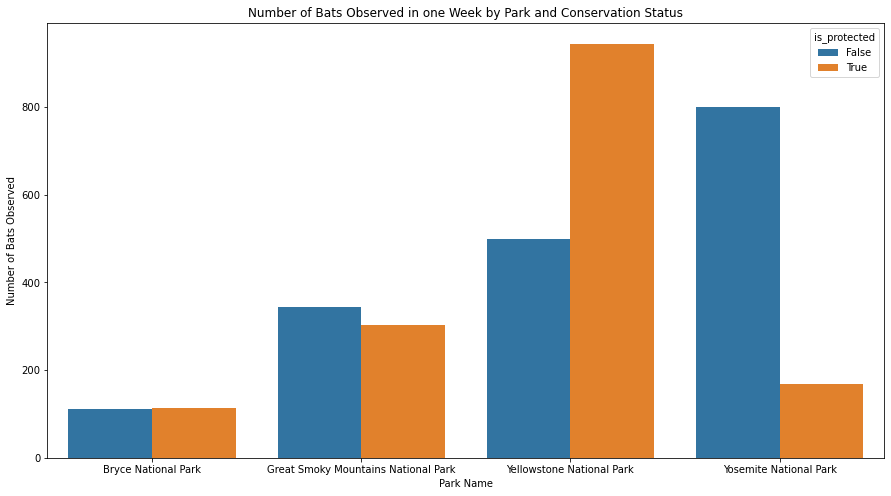

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize = (15, 8))
sns.barplot(x = bats_park_protections.park_name, y = bats_park_protections.observations, hue = bats_park_protections.is_protected)
plt.title('Number of Bats Observed in one Week by Park and Conservation Status')
plt.xlabel('Park Name')
plt.ylabel('Number of Bats Observed')
plt.show()
plt.clf()

Bats are most likely to be observed in Yellowstone, where most of the observed species are protected.

Birds are almost as likely as mammals to be protected. We should explore which bird species are most commonly-observed in each park.

In [56]:
# Explore observations of bird species in the parks

parks = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

for park in parks:
    max_park_bird = merge_df.observations[(merge_df.park_name == park) & (merge_df.category == 'Bird')].max()
    max_park_bird_species = merge_df.common_names[(merge_df.observations == max_park_bird) & (merge_df.park_name == park) & (merge_df.category == 'Bird')]
    bird_status = merge_df.is_protected[(merge_df.observations == max_park_bird) & (merge_df.park_name == park)]
    print(park + ': ' + max_park_bird_species + ', '+ str(max_park_bird) , bird_status)
    pd.set_option('display.max_colwidth', None)

2922    Great Smoky Mountains National Park: Mountain White-Crowned Sparrow, 123
5102                        Great Smoky Mountains National Park: Sooty Tern, 123
Name: common_names, dtype: object 2453    False
2922    False
5102    False
Name: is_protected, dtype: bool
2330    Yosemite National Park: Blue-Winged Teal, 190
Name: common_names, dtype: object 1649    False
1650    False
2330    False
4521    False
Name: is_protected, dtype: bool
4098    Bryce National Park: Eurasian Treecreeper, 158
Name: common_names, dtype: object 4098    False
Name: is_protected, dtype: bool
517    Yellowstone National Park: Lawrence's Goldfinch, 305
Name: common_names, dtype: object 517    False
Name: is_protected, dtype: bool


There is no clear pattern to the types of birds that are most likely to be observed in each park. However, none of the most common species are protected. 

In [58]:
# Check which protected bird species is most commonly observed in each park

parks = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

for park in parks:
    max_park_bird = merge_df.observations[(merge_df.park_name == park) & (merge_df.category == 'Bird') & (merge_df.is_protected == True)].max()
    max_park_bird_species = merge_df.common_names[(merge_df.observations == max_park_bird) & (merge_df.park_name == park) & (merge_df.category == 'Bird')]
    print(park + ': ' + max_park_bird_species + ', '+ str(max_park_bird))
    pd.set_option('display.max_colwidth', None)

418    Great Smoky Mountains National Park: Lesser Scaup, 115
Name: common_names, dtype: object
25                                            Yosemite National Park: Bonaparte's Gull, 167
1432                                               Yosemite National Park: Common Loon, 167
1433    Yosemite National Park: Common Loon, Great Northern Diver, Great Northern Loon, 167
Name: common_names, dtype: object
449    Bryce National Park: Olive-Sided Flycatcher, 130
Name: common_names, dtype: object
347    Yellowstone National Park: Marbled Godwit, 266
Name: common_names, dtype: object


The most common protected species of birds at 3 of the 4 parks are water/shore birds. It makes sense that this would not be the case at Bryce National Park, since it has very little water.

# Conclusions

This analysis answered the following questions:

What is the distribution of conservation status for animals?
The majority of observed species are not under protection. Most of the species that are protected are listed as Species of Concern.

Are certain types of species more likely to be endangered?
Mammals and birds are the most likely type of species to be protected.

Are the differences between species and their conservation status significant?
There is no observed statistical significance between mammals and birds. Mammals are more likely than reptiles to be protected, but the significance of the difference between reptile and birds is inconclusive.

Which species were spotted the most at each park?
The top observed species at each park were vascular plants, none of which are protected.
The most commonly-observed mammals were species of bats, which are most commonly observed at Yellowstone, where most of the observed species are protected.
The most commonly-observed protected bird species are almost all water/shore birds. This is a reasonable observation, since shorebirds are in decline overall more than most other types of birds.

# Further Research

These observations took place over one week, so this data does not show fluctuations throughout different times of the year. It is also likely that the type of environment would impact what species are observed. For example, Bryce Canyon National Park is mostly desert-like, while Great Smoky Mountains National Park is heavily wooded mountains. There are also many other national parks not included in this study that would be of interest due to their different geographical features, such as the colder climates of Glacier National Park and Denali National Park.